# Cataract Detection - Training Notebook

This notebook walks you through the process of training a cataract detection model using traditional machine learning techniques. The steps include loading the trained model, preprocessing images, extracting features, making predictions, and saving the results.

In [1]:
# Importing Required Libraries
from pathlib import Path
import pandas as pd
import pickle
from src.dataset import preprocess_images_predict
from src.features import extract_features_in_directory
from src.config import MODELS_DIR, PROCESSED_DATA_DIR, RAW_DATA_DIR
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
import seaborn as sns
from loguru import logger

2025-01-07 02:53:33.659 | INFO     | src.config:<module>:11 - PROJ_ROOT path is: /home/sih/Documents/GI/l4_s1/ml/cataract-ai


## Step 1: Define Paths and Classes

In this step, we define the necessary paths for the input images, the model, and where the processed features and predictions will be saved. We also define the classes that the model will predict.

In [2]:
# Define paths
input_path = RAW_DATA_DIR / "predict"
image_output_path = PROCESSED_DATA_DIR / "predict"
features_output_csv = PROCESSED_DATA_DIR / "feature_matrix_predict.csv"
model_path = MODELS_DIR / "model.pkl"

# Define possible classes
classes = ["normal", "cataract"]

## Step 2: Load the Trained Model

The model has been previously trained and saved. Here, we load the trained model into memory for making predictions. If the model file is not found, an error is raised.

In [3]:
logger.info("Loading the trained model...")
if not model_path.exists():
    raise FileNotFoundError(f"Model file '{model_path}' not found.")
with open(model_path, "rb") as file:
    model = pickle.load(file)
logger.success("Model loaded successfully.")

2025-01-07 02:53:36.534 | INFO     | __main__:<module>:1 - Loading the trained model...
2025-01-07 02:53:36.857 | SUCCESS  | __main__:<module>:6 - Model loaded successfully.


## Step 3: Preprocess Images

Next, we preprocess the images stored in the `predict` folder. This step may involve resizing, normalizing, or performing other transformations on the images to prepare them for feature extraction.

In [4]:
logger.info(f"Preprocessing images from: {input_path}")
if not input_path.exists() or not any(input_path.iterdir()):
    raise FileNotFoundError(f"Input path '{input_path}' is empty or does not exist.")
preprocess_images_predict(input_path, image_output_path)
logger.success(f"Processed images saved to: {image_output_path}")

2025-01-07 02:53:36.894 | INFO     | __main__:<module>:1 - Preprocessing images from: /home/sih/Documents/GI/l4_s1/ml/cataract-ai/data/raw/predict
2025-01-07 02:53:37.739 | SUCCESS  | src.dataset:process_image:67 - Image sauvegardée : /home/sih/Documents/GI/l4_s1/ml/cataract-ai/data/processed/predict/image_41.png
2025-01-07 02:53:42.616 | SUCCESS  | src.dataset:process_image:67 - Image sauvegardée : /home/sih/Documents/GI/l4_s1/ml/cataract-ai/data/processed/predict/image_35 copy.png
2025-01-07 02:53:50.913 | SUCCESS  | src.dataset:process_image:67 - Image sauvegardée : /home/sih/Documents/GI/l4_s1/ml/cataract-ai/data/processed/predict/image_34.png
2025-01-07 02:53:50.954 | ERROR    | src.dataset:process_image:30 - Erreur : Impossible de lire l'image /home/sih/Documents/GI/l4_s1/ml/cataract-ai/data/raw/predict/.gitignore
2025-01-07 02:53:52.735 | SUCCESS  | src.dataset:process_image:67 - Image sauvegardée : /home/sih/Documents/GI/l4_s1/ml/cataract-ai/data/processed/predict/image_37.png


libpng warning: iCCP: known incorrect sRGB profile


2025-01-07 02:54:07.047 | SUCCESS  | src.dataset:process_image:67 - Image sauvegardée : /home/sih/Documents/GI/l4_s1/ml/cataract-ai/data/processed/predict/image_33.png
2025-01-07 02:54:10.859 | SUCCESS  | src.dataset:process_image:67 - Image sauvegardée : /home/sih/Documents/GI/l4_s1/ml/cataract-ai/data/processed/predict/image_39.png
2025-01-07 02:54:17.983 | SUCCESS  | src.dataset:process_image:67 - Image sauvegardée : /home/sih/Documents/GI/l4_s1/ml/cataract-ai/data/processed/predict/image_38.png
2025-01-07 02:54:19.789 | SUCCESS  | src.dataset:process_image:67 - Image sauvegardée : /home/sih/Documents/GI/l4_s1/ml/cataract-ai/data/processed/predict/image_38 copy.png
2025-01-07 02:54:20.534 | SUCCESS  | src.dataset:process_image:67 - Image sauvegardée : /home/sih/Documents/GI/l4_s1/ml/cataract-ai/data/processed/predict/image_39 copy.png
2025-01-07 02:54:36.629 | SUCCESS  | src.dataset:process_image:67 - Image sauvegardée : /home/sih/Documents/GI/l4_s1/ml/cataract-ai/data/processed/pre

## Step 4: Extract Features

After preprocessing the images, we extract features that can be used for model prediction. These features could include patterns, textures, or other image characteristics relevant for cataract detection.

In [5]:
logger.info(f"Extracting features from processed images in: {image_output_path}")
feature_matrix, filenames = extract_features_in_directory(image_output_path, return_filenames=True)
logger.success(f"Feature extraction complete. Features saved to: {features_output_csv}")
pd.DataFrame(feature_matrix).to_csv(features_output_csv, index=False)

2025-01-07 02:54:37.226 | INFO     | __main__:<module>:1 - Extracting features from processed images in: /home/sih/Documents/GI/l4_s1/ml/cataract-ai/data/processed/predict
2025-01-07 02:54:37.233 | INFO     | src.features:extract_features_in_directory:142 - Processing image_41.png...
2025-01-07 02:54:37.266 | INFO     | src.features:extract_features_in_directory:142 - Processing image_35 copy.png...
2025-01-07 02:54:37.281 | INFO     | src.features:extract_features_in_directory:142 - Processing image_34.png...
2025-01-07 02:54:37.312 | INFO     | src.features:extract_features_in_directory:142 - Processing image_37.png...
2025-01-07 02:54:37.352 | INFO     | src.features:extract_features_in_directory:142 - Processing image_36 copy.png...
2025-01-07 02:54:37.398 | INFO     | src.features:extract_features_in_directory:142 - Processing image_33.png...
2025-01-07 02:54:37.430 | INFO     | src.features:extract_features_in_directory:142 - Processing image_39.png...
2025-01-07 02:54:37.451 | I

## Step 5: Make Predictions

With the extracted features, we can now make predictions using the trained model. The predictions are based on the extracted features, and the output is the class (either 'normal' or 'cataract') for each image.

In [6]:
logger.info("Making predictions...")
predictions = model.predict(feature_matrix)
predicted_classes = [classes[pred] for pred in predictions]

2025-01-07 02:54:37.610 | INFO     | __main__:<module>:1 - Making predictions...


## Step 6: Create a Results DataFrame

The predictions are now stored in a DataFrame along with the corresponding image filenames. This DataFrame will be displayed to give us a clear overview of the predictions for each image.

In [7]:
results_df = pd.DataFrame({"filename": filenames, "prediction": predicted_classes})
logger.success("Predictions complete.")
display(results_df)

2025-01-07 02:54:37.668 | SUCCESS  | __main__:<module>:2 - Predictions complete.


,filename,prediction
0,image_41.png,normal
1,image_35 copy.png,cataract
2,image_34.png,cataract
3,image_37.png,normal
4,image_36 copy.png,normal
5,image_33.png,normal
6,image_39.png,normal
7,image_38.png,normal
8,image_38 copy.png,normal
9,image_39 copy.png,normal


## Step 7: Save Predictions to a CSV File

Finally, we save the predictions to a CSV file, which can be used later for analysis or reporting. The predictions are stored in the `predictions.csv` file.

In [8]:
results_output_csv = PROCESSED_DATA_DIR / "predictions.csv"
results_df.to_csv(results_output_csv, index=False)
logger.success(f"Predictions saved to: {results_output_csv}")

2025-01-07 02:54:37.862 | SUCCESS  | __main__:<module>:3 - Predictions saved to: /home/sih/Documents/GI/l4_s1/ml/cataract-ai/data/processed/predictions.csv


## Step 8: Display Images with Predictions

To visualize the results, we display some of the images with their predictions. This allows us to quickly check how well the model is performing by visually inspecting the images along with their predicted labels.

2025-01-07 02:54:37.950 | INFO     | __main__:<module>:1 - Displaying images with predictions...


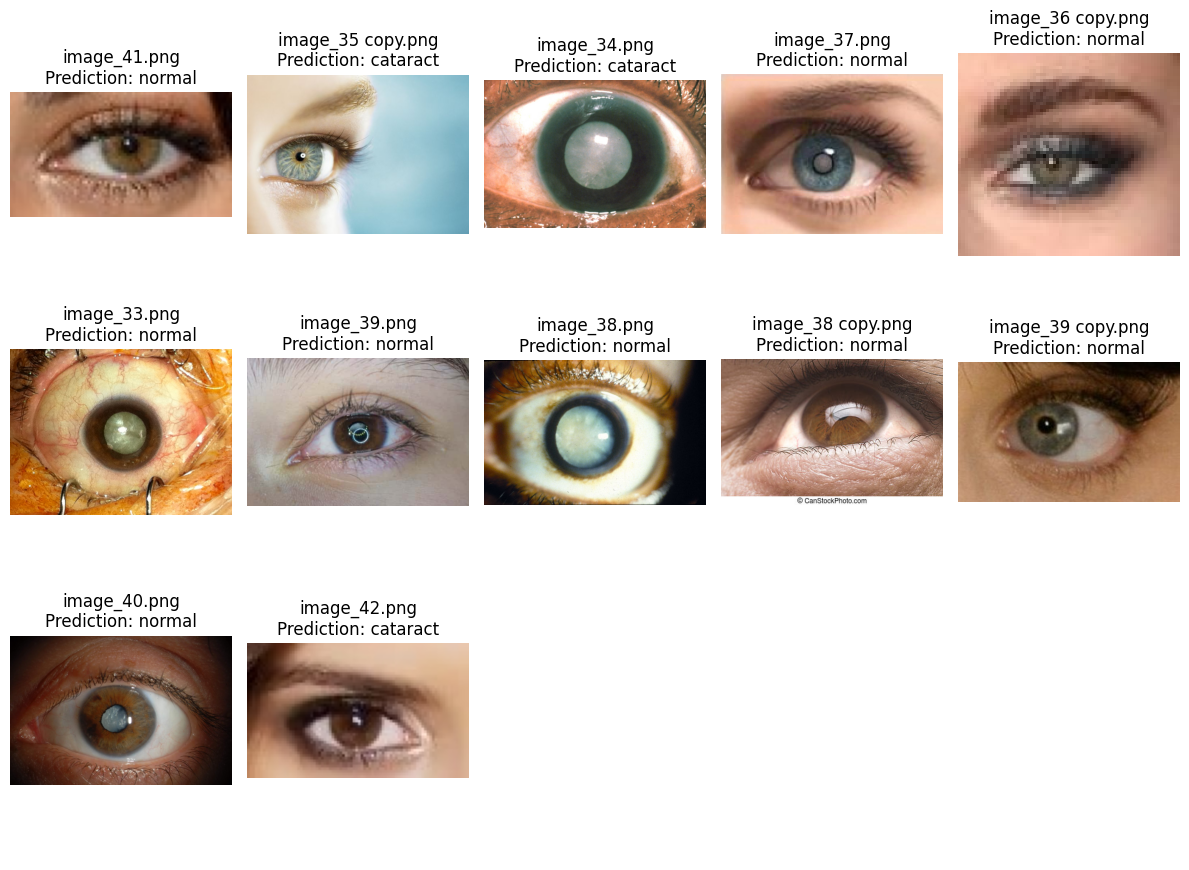

In [9]:
logger.info("Displaying images with predictions...")

# Calculate the number of rows and columns for the subplot grid based on the number of images
num_images = len(results_df)
num_cols = 5  # Number of columns (can adjust this)
num_rows = (num_images // num_cols) + (num_images % num_cols > 0)  # Calculate number of rows

# Create a grid of subplots to display all images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 3))  # Adjust figure size as needed
axes = axes.flatten()

# Loop through each image and display it with its prediction
for ax, (filename, prediction) in zip(axes, results_df.itertuples(index=False)):
    image_path = input_path / filename
    if image_path.exists():
        img = Image.open(image_path)
        ax.imshow(img)
        ax.set_title(f"{filename}\nPrediction: {prediction}")
        ax.axis("off")

# Hide unused axes if there are any
for ax in axes[num_images:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


## Step 9: Plot Class Distribution

Finally, we plot the distribution of predicted classes. This gives us a visual representation of how many images were classified as 'normal' and how many as 'cataract'.

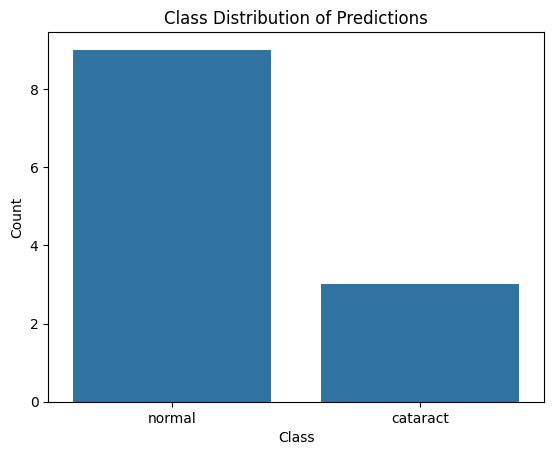

2025-01-07 02:54:41.331 | INFO     | __main__:<module>:7 - Presentation complete!


In [10]:
sns.countplot(data=results_df, x="prediction")
plt.title("Class Distribution of Predictions")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

logger.info("Presentation complete!")